# Hotel Booking EDA AM

### Embark on a journey through the intricate world of hotel bookings with this comprehensive dataset. Delve into the nuanced details of reservations made for both city and resort hotels, unlocking a treasure trove of insights that can shape your understanding of booking dynamics.

### This dataset unveils the secrets behind booking patterns. From the timing of reservations to the optimal duration of stay for the most favorable daily rates, you'll navigate through a spectrum of variables. Discover not only when bookings were made but also the factors influencing choices, such as the number of adults, children, and babies in each reservation.

### Peel back the layers of this dataset to explore beyond the basics

In [1]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [2]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
hotel_df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [4]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# let's upload the dataset
from google.colab import files
uploaded = files.upload()

Saving Hotel Bookings (1).csv to Hotel Bookings (1).csv


In [8]:
 hotel_df.shape

(119390, 32)

In [9]:
df = hotel_df.copy()

In [10]:
# before cleaning the data total number of rows and columns in data
df.shape

(119390, 32)

## Data wrangling :

## Cleaning data
### Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

### While cleaning data we will perform following steps: \

### 1) Remove duplicate rows \
### 2) Handling missing values. \
### 3)Convert columns to appropriate datatypes. \
### 4)Adding important columns

1) drop duplicates

In [11]:
# Show no. of rows of duplicate rows
hotel_df[hotel_df.duplicated()].shape


(31994, 32)

In [12]:
# Drop duplicate values from dataset
hotel_df.drop_duplicates(inplace = True)
hotel_df.shape

(87396, 32)

2) Missing value handling

In [13]:
# checking with columns which have missing values
hotel_df.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [14]:
# Filling missing values with Nan
hotel_df.replace('',np.nan,inplace = True)

In [15]:
# Null values are replaced using for loop and .fillna()

null_columns = ['company','agent','children']
for column in null_columns:
  hotel_df[column].fillna(0, inplace = True)

In [16]:

# Null values in country column is replced by 'others' using .fillna()
hotel_df['country'].fillna('others', inplace = True)

In [17]:
# after clearing the data total number of rows and columns in data
print(f' We have total {hotel_df.shape[0]} rows and {hotel_df.shape[1]} columns.')

 We have total 87396 rows and 32 columns.


In [18]:
hotel_df.shape

(87396, 32)

In [19]:
hotel_df.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

3) Convert datatypes if necessary

In [20]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [21]:
# change the datatype of specific columns
hotel_df[['children','agent','company']]=hotel_df[['children','agent','company']].astype ('int64')


In [22]:
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format= '%Y-%m-%d')

4) adding imp column (optional)

In [23]:
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']


In [24]:
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

In [25]:
hotel_df['total_people'] = hotel_df['adults'] + df['babies'] + hotel_df['children']

In [26]:
hotel_df['total_bookings'] = hotel_df['previous_cancellations'] + hotel_df['previous_bookings_not_canceled']

In [27]:
hotel_df['total_people']


0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: total_people, Length: 87396, dtype: float64

5) Correlation

In [28]:
hotel_df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people,total_bookings
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,...,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567,3.630658,2.025253,0.214403
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,...,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946,2.763449,0.794319,1.907101
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,5.000000,2.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,69.000000,55.000000,78.000000


In [29]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,total_bookings
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0,0


In [30]:
num_df= hotel_df[[ 'is_canceled','lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','adr','required_car_parking_spaces','total_of_special_requests','reservation_status_date' ]]

In [31]:
num_df1= hotel_df[[ 'is_canceled','lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','adr','required_car_parking_spaces','total_of_special_requests','reservation_status_date' ]]

<ipython-input-32-424c5e9983fe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = num_df1.corr()


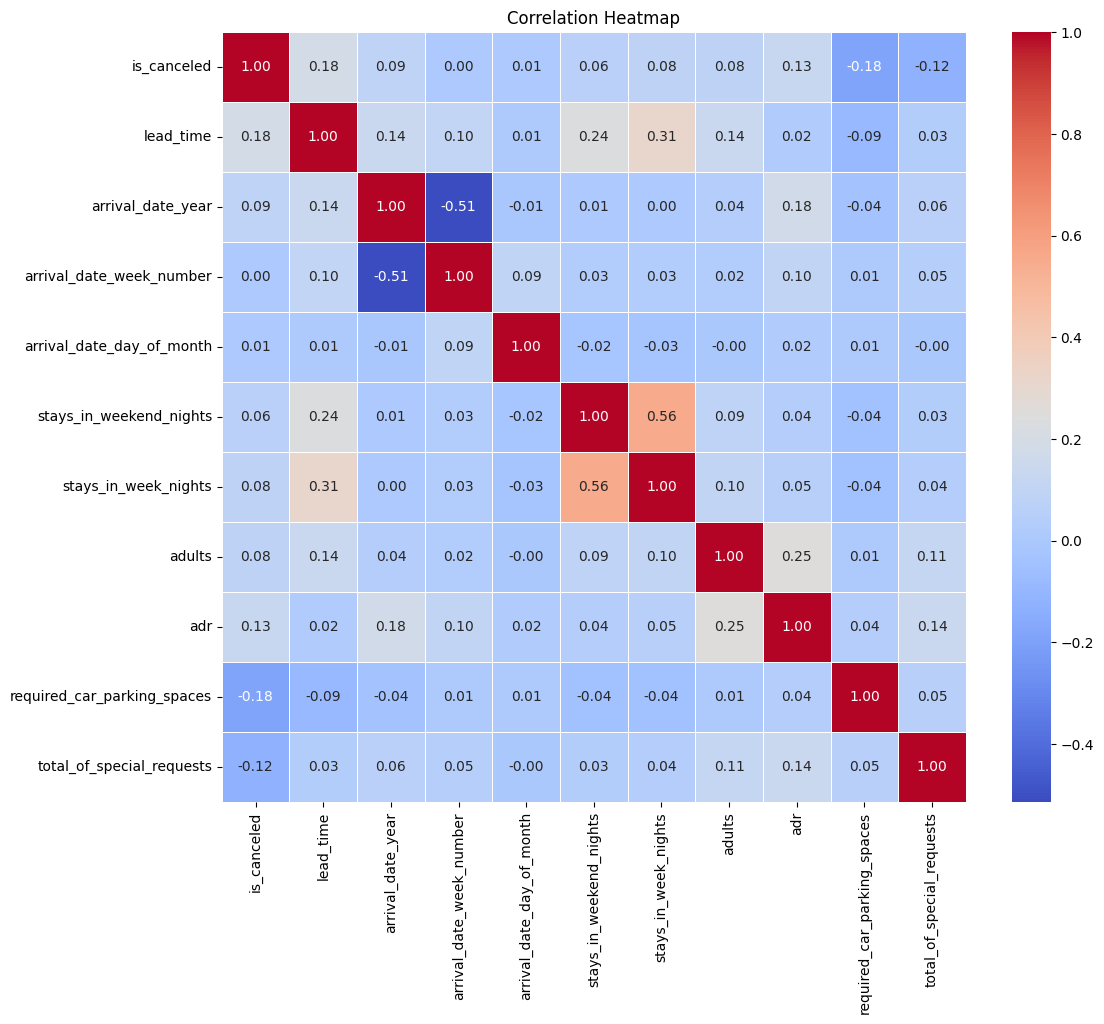

In [32]:
correlation_matrix = num_df1.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

6) outlier handling

In [33]:
import plotly.express as px


fig = px.scatter(hotel_df, x='total_stay', y='adr', title='Scatter Plot of ADR vs Total Stay',
                 labels={'total_stay': 'Total Stay', 'adr': 'ADR'})


fig.show()


Here, we have one value which is more than 5000, i.e. much more higher than the average. So, we can remove it for better result.

In [34]:
hotel_df.drop(hotel_df[hotel_df['adr'] > 5000].index, inplace = True)

In [35]:
import plotly.express as px

# Assuming 'total_stay' and 'adr' are the correct column names in hotel_df
fig = px.scatter(hotel_df, x='total_stay', y='adr', title='Scatter Plot of ADR vs Total Stay',
                 labels={'total_stay': 'Total Stay', 'adr': 'ADR'})

# Set figure size
fig.update_layout(width=1200, height=600)

# Show the interactive plot
fig.show()


In [36]:
hotel_df.shape

(87395, 35)

we dont fi

## questions

1) What is percentage of bookings in each hotel?

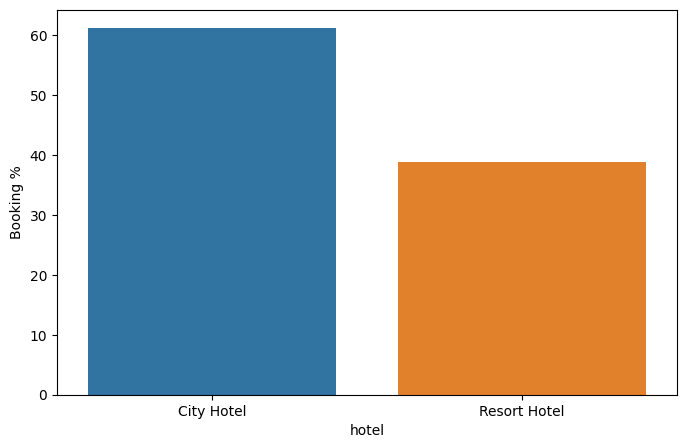

In [37]:
grouped_by_hotel = hotel_df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/hotel_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

2) Which hotel has higher lead time?

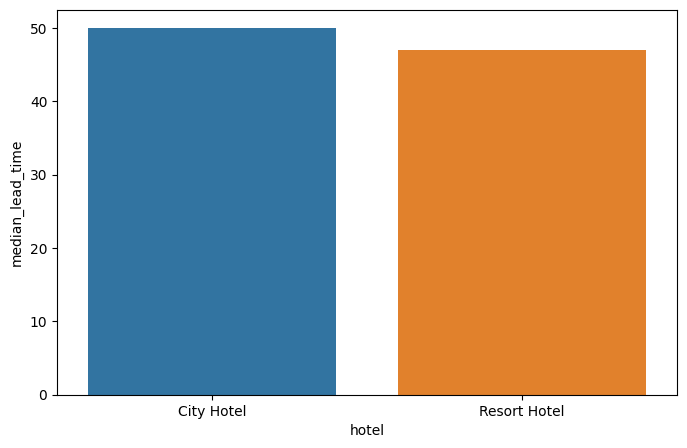

In [38]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.show()


 Which type of hotel is most preferred ?

In [39]:
# visualization code
preferred_hotel = hotel_df['hotel'].value_counts()
preferred_hotel

City Hotel      53427
Resort Hotel    33968
Name: hotel, dtype: int64

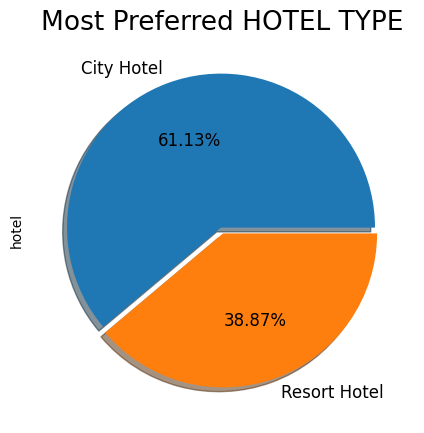

In [40]:
# visualization using pie-chart
preferred_hotel.plot.pie(explode = [0.02,0.02], autopct = '%1.2f%%', shadow = True, fontsize = 12, figsize = (10,5))
plt.title('Most Preferred HOTEL TYPE', fontsize = 19)
plt.show()

3) What is preferred stay length in each hotel?

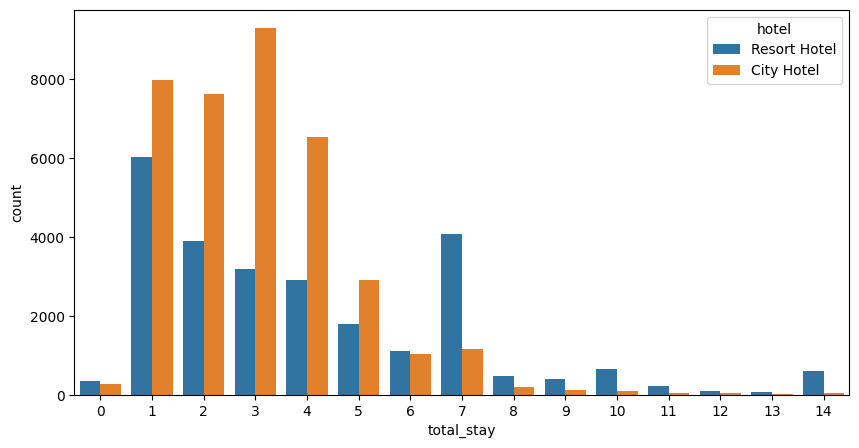

In [41]:
not_canceled = hotel_df[hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

4) Which agent makes most no. of bookings?

In [42]:
#  visualization code
top_bookings_by_agent = hotel_df['agent'].value_counts().reset_index().rename(columns={'index':'agent','agent':'num_of_bookings'})[:10]
top_bookings_by_agent

,agent,num_of_bookings
0,9,28759
1,240,13028
2,0,12193
3,14,3349
4,7,3300
5,250,2779
6,241,1644
7,28,1502
8,8,1383
9,1,1232


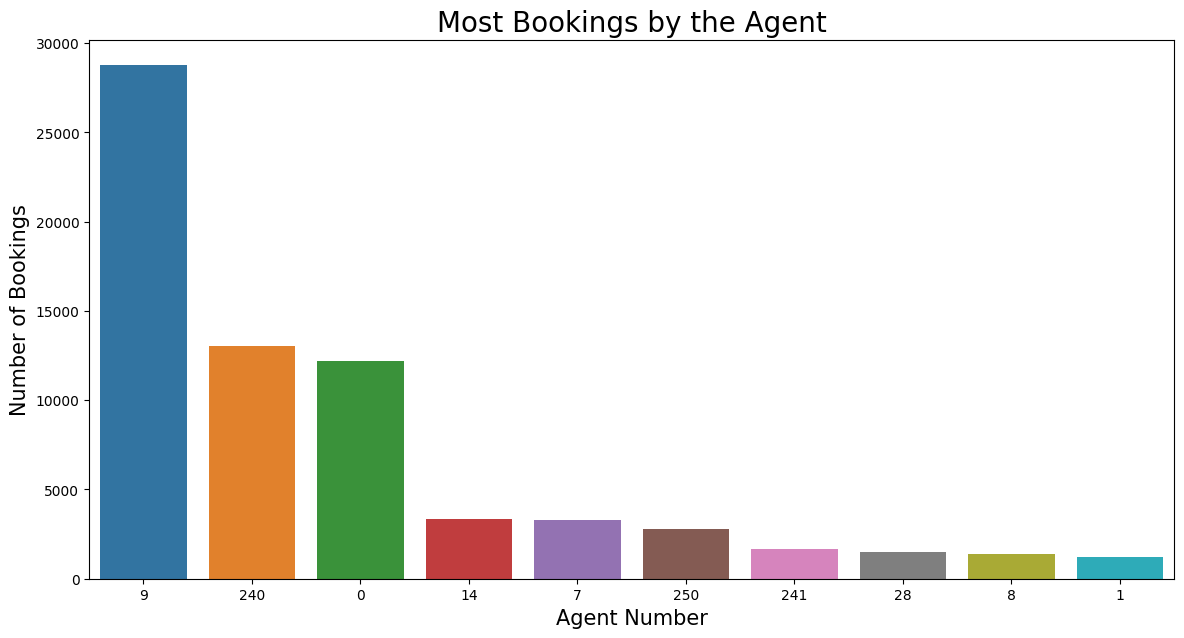

In [43]:
# barplot is used for visualization
plt.figure(figsize=(14,7))
sns.barplot(x=top_bookings_by_agent['agent'],y=top_bookings_by_agent['num_of_bookings'],order=top_bookings_by_agent['agent'])
plt.title('Most Bookings by the Agent', fontsize=20)
plt.ylabel('Number of Bookings', fontsize=15)
plt.xlabel('Agent Number', fontsize=15)
plt.show()

5)Which room type is in most demand and

6)which room type generates highest adr?

In [44]:
#  visualization code
room_type = hotel_df['assigned_room_type'].value_counts()
room_type

A    46312
D    22432
E     7195
F     3627
G     2498
C     2165
B     1820
H      706
I      357
K      276
P        6
L        1
Name: assigned_room_type, dtype: int64

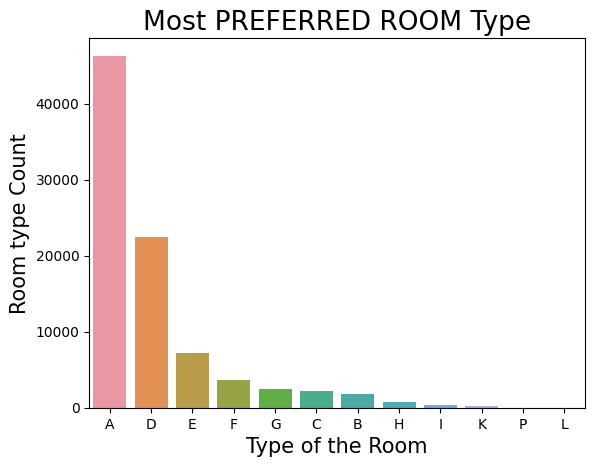

In [45]:
# countplot is used for visualization

sns.countplot(x = hotel_df['assigned_room_type'], order = hotel_df['assigned_room_type'].value_counts().index)
plt.title("Most PREFERRED ROOM Type", fontsize = 19)
plt.xlabel('Type of the Room', fontsize = 15)
plt.ylabel('Room type Count', fontsize = 15)
plt.show()

In [46]:
highest_adr = hotel_df.groupby('hotel')['adr'].mean().reset_index()
highest_adr

,hotel,adr
0,City Hotel,110.886949
1,Resort Hotel,99.025346


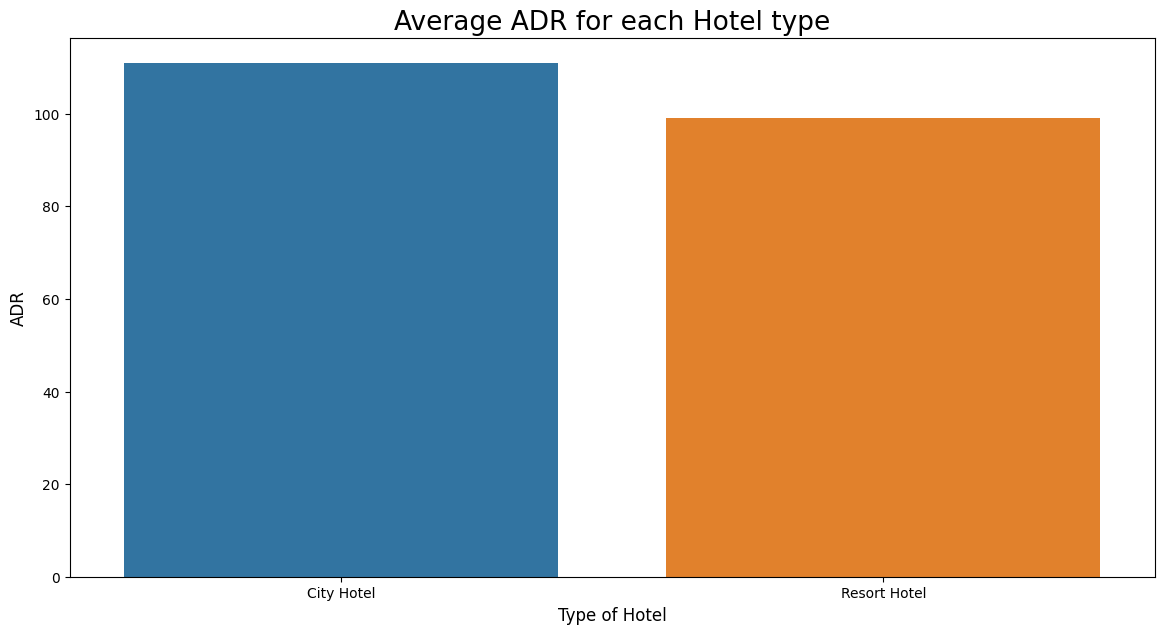

In [47]:
# Visualization of highest adr using barplot

plt.figure(figsize=(14,7))
sns.barplot(x = highest_adr['hotel'], y= highest_adr['adr'])
plt.title('Average ADR for each Hotel type', fontsize=19)
plt.xlabel('Type of Hotel', fontsize= 12)
plt.ylabel('ADR', fontsize= 12)
plt.show()

7) Which meal type is most preffered meal of customers?

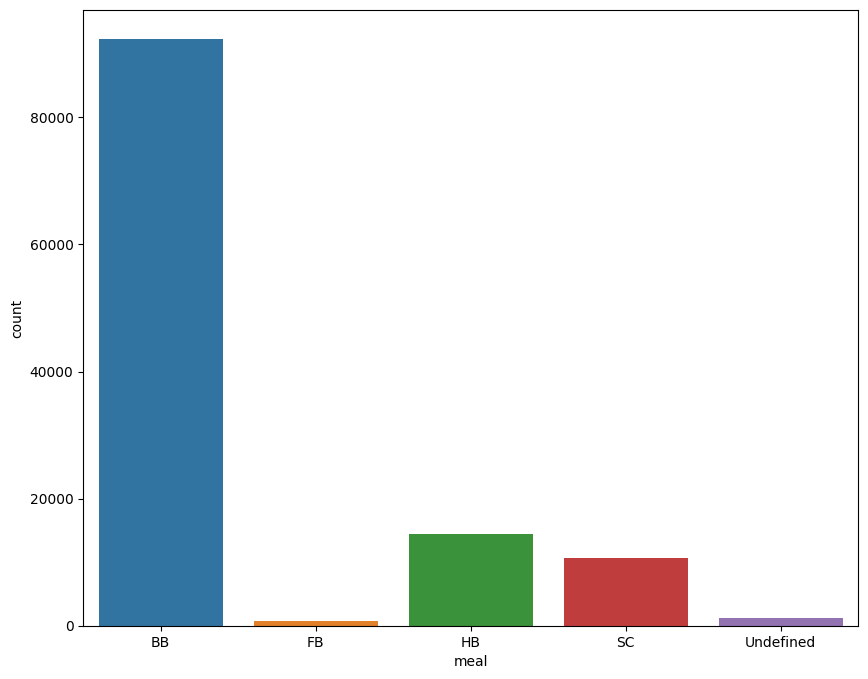

In [48]:
plt.figure( figsize=(10, 8))

sns.countplot(x = df['meal'])
plt.show()

8) What is percentage of bookings in each hotel?

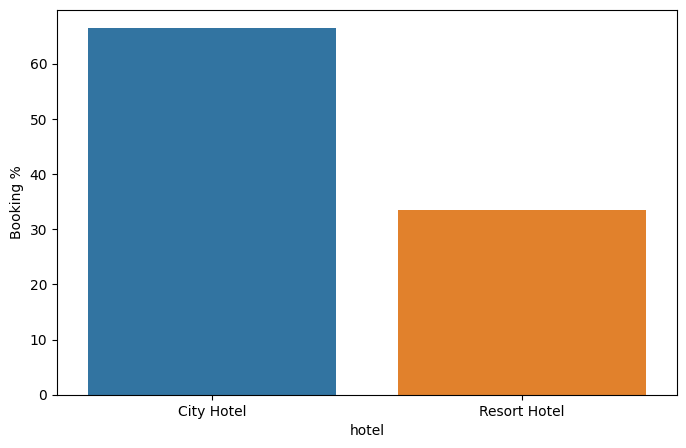

In [49]:
grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

9) which hotel type seems to make more revenue?

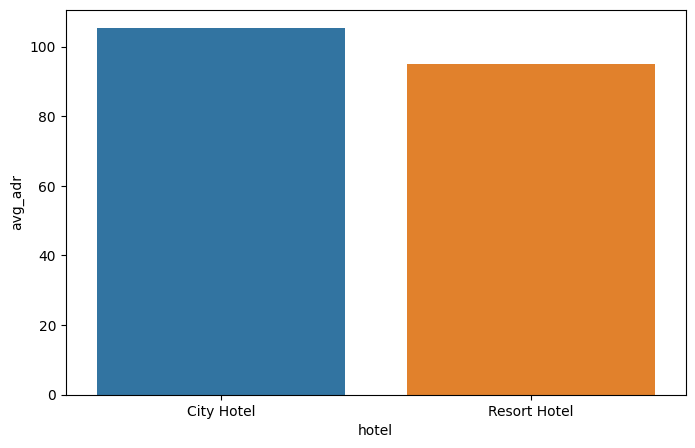

In [50]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

10) What is preferred stay length in each hotel?

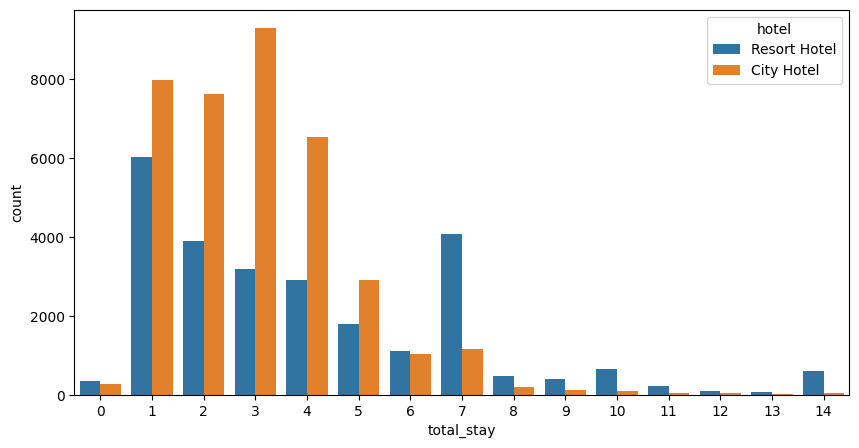

In [51]:
not_canceled = hotel_df[hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

11) Which hotel has longer waiting time?

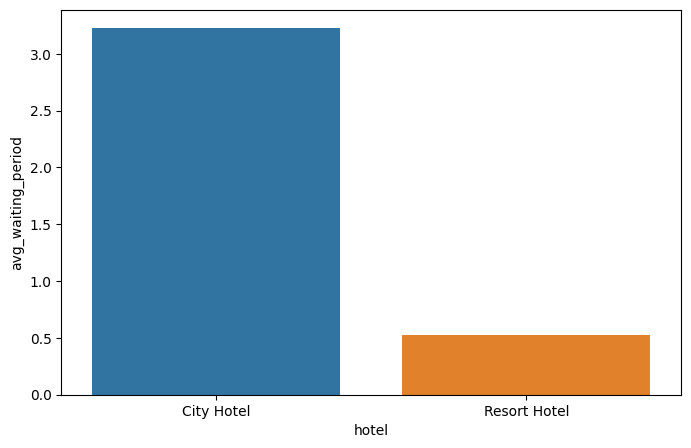

In [52]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

In [53]:
import plotly.express as px

d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns={'days_in_waiting_list': 'avg_waiting_period'}))
fig = px.bar(d5, x='hotel', y='avg_waiting_period', title='Average Waiting Period by Hotel')
fig.show()


12) Which hotel has higher bookings cancellation rate

In [54]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,33102,79330,41.73
Resort Hotel,11122,40060,27.76


13) Which hotel has high chance that its customer will return for another stay?

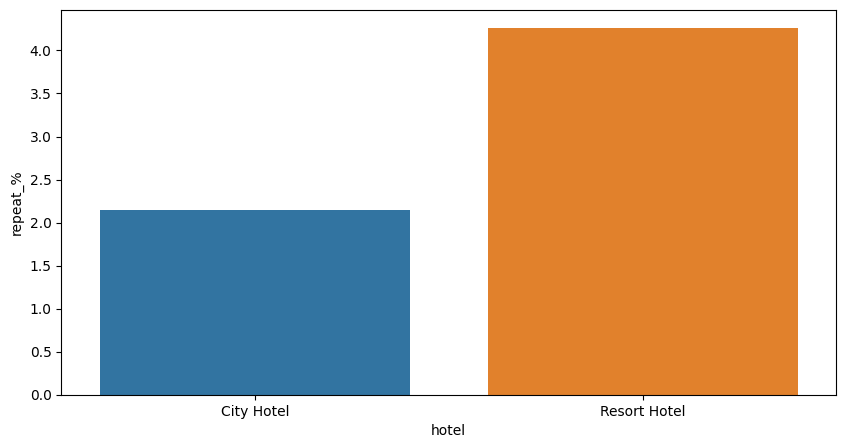

In [55]:
# Selecting and counting repeated customers bookings
repeated_data = hotel_df[hotel_df['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

14) Which is the most common channel for booking hotels?

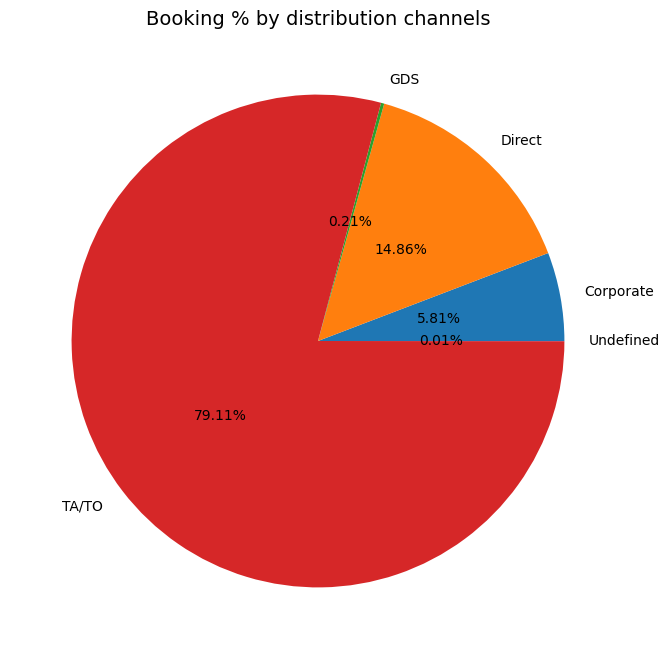

In [56]:
group_by_dc = hotel_df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/hotel_df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=None, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

15) Which distribution channel brings better revenue generating deals for hotels?

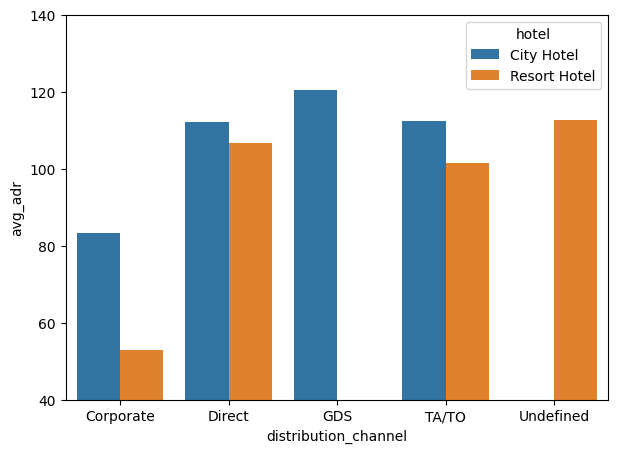

In [57]:
group_by_dc_hotel = hotel_df.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

In [58]:
hotel_df.shape

(87395, 35)

16) Which significant distribution channel has highest cancellation percentage?

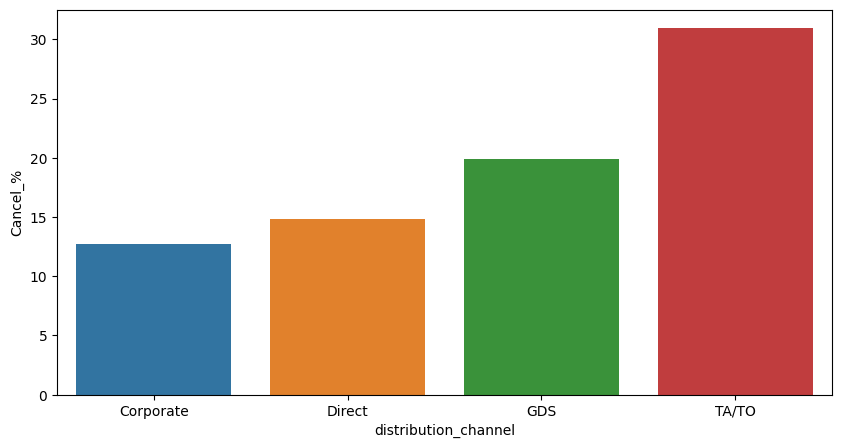

In [59]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

Let us see what causes the cancelation of bookings of rooms by customers

One question can arise that may be longer waiting period or longer lead time causes the cancellation of bookings, let us check that.

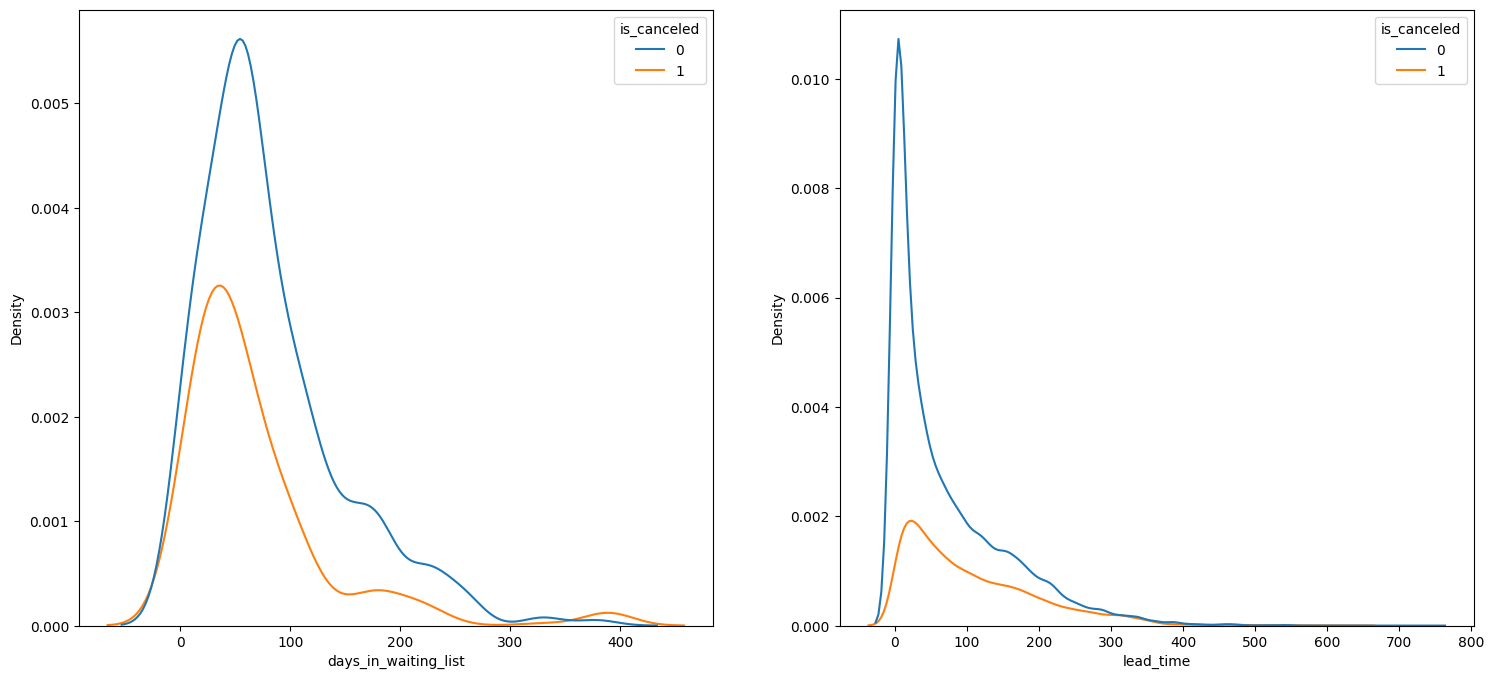

In [60]:
waiting_bookings = hotel_df[hotel_df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = hotel_df['lead_time'], hue = hotel_df['is_canceled'])
plt.show()

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.

Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

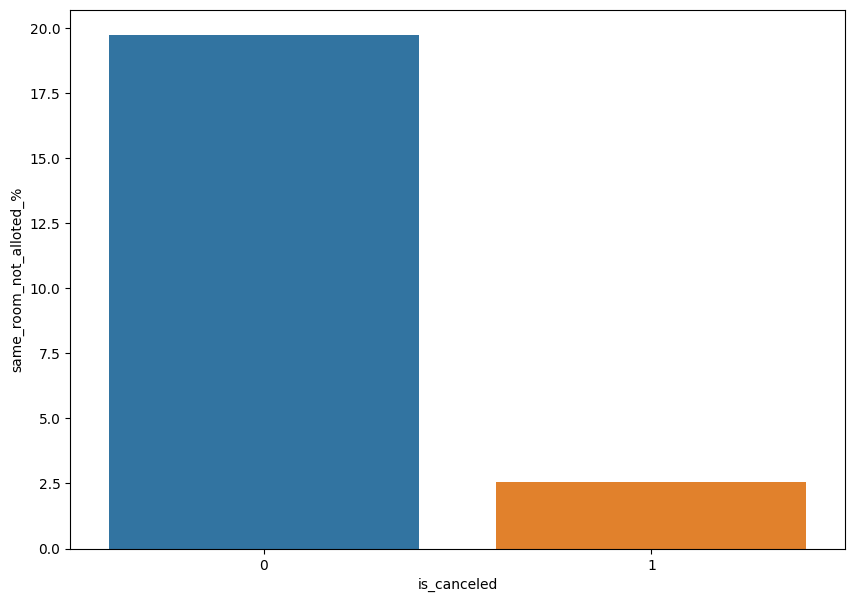

In [61]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

hotel_df['same_room_not_alloted'] = hotel_df.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = hotel_df.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()

17) Type of guest visited in hotel

18) special request by guest ?

19) Prefered No. of stay guest prefered to stay?

20) which type of crowd visited the most in specific type of hotel?

21) Precentage of repeated guest

4) Which agent makes most no. of bookings?

5)Which room type is in most demand and